In [4]:
import numpy as np
import math

np.__version__

'2.0.0'

In [5]:
class TicTacToe:
    def __init__(self, size=3):
        # square shape
        self.row_count    = size
        self.column_count = size

        self.action_size = self.row_count * self.column_count

    def get_initial_state(self):
        return np.zeros((self.row_count, self.column_count), dtype=np.int8)

    # internal helper
    def action_to_row_col(self, action):
        """turn action number into row and column"""
        row    = action // self.column_count
        column = action  % self.column_count

        return row, column

    def get_next_state(self, state, action, player):
        row, column = self.action_to_row_col(action)
        
        state[row, column] = player
        return state

    def get_valid_moves(self, state):
        return (state.reshape(-1) == 0).astype(np.uint8)

    def check_win(self, state, action):
        if action == None:
            return False

        row, column = self.action_to_row_col(action)
        # infer the player from the state
        player = state[row, column]

        return (
            np.sum(state[row, :])       == player * self.column_count
            or np.sum(state[:, column]) == player * self.row_count
            or np.sum(np.diag(state))   == player * self.row_count # TODO: this only makes sense for square... why do we track column and row count separately?
            or np.sum(np.diag(np.fliplr(state))) == player * self.row_count
        )
    
    def check_value_and_terminated(self, state, action):
        if self.check_win(state, action):
            return 1, True
        elif np.sum(self.get_valid_moves(state)) == 0:
            return 0, True
        else:
            return 0, False
        
    def get_opponent(self, player):
        return -player

    def get_opponent_value(self, value):
        return -value


In [6]:
tictactoe = TicTacToe()
player = 1

state = tictactoe.get_initial_state()

In [7]:
state

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [8]:
tictactoe.get_valid_moves(state)

array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [9]:
player = 1
action = 4
state = tictactoe.get_next_state(state, action, player)
print(state)

[[0 0 0]
 [0 1 0]
 [0 0 0]]


In [10]:
tictactoe.get_valid_moves(state)

array([1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [22]:
# let's play TicTacToe, we'll provide the input for each player as we go until the game is over, then print the results at the end
tictactoe = TicTacToe()
state = tictactoe.get_initial_state()
player = -1
while True:
    print(state)
    valid_moves = tictactoe.get_valid_moves(state)
    print(f"Player {player}'s available moves: {[i for i in range(len(valid_moves)) if valid_moves[i] == 1]}")
    try:
        action = int(input(f"Player {player} enter your move (0-8): "))
    except ValueError:
        print("Invalid input, please enter a number between 0 and 8.")
        continue
    if valid_moves[action] != 1:
        print("Invalid move, try again.")
        continue
    state = tictactoe.get_next_state(state, action, player)
    value, terminated = tictactoe.check_value_and_terminated(state, action)
    if terminated:
        if value == 0:
            print("It's a draw!")
        else:
            print(f"Player {player} wins!")
        print(state)
        break
    player = tictactoe.get_opponent(player)


[[0 0 0]
 [0 0 0]
 [0 0 0]]
Player -1's available moves: [0, 1, 2, 3, 4, 5, 6, 7, 8]
[[-1  0  0]
 [ 0  0  0]
 [ 0  0  0]]
Player 1's available moves: [1, 2, 3, 4, 5, 6, 7, 8]
[[-1  1  0]
 [ 0  0  0]
 [ 0  0  0]]
Player -1's available moves: [2, 3, 4, 5, 6, 7, 8]
[[-1  1  0]
 [-1  0  0]
 [ 0  0  0]]
Player 1's available moves: [2, 4, 5, 6, 7, 8]
[[-1  1  0]
 [-1  0  1]
 [ 0  0  0]]
Player -1's available moves: [2, 4, 6, 7, 8]
[[-1  1  0]
 [-1  0  1]
 [ 0 -1  0]]
Player 1's available moves: [2, 4, 6, 8]
[[-1  1  0]
 [-1  0  1]
 [ 1 -1  0]]
Player -1's available moves: [2, 4, 8]
Invalid input, please enter a number between 0 and 8.
[[-1  1  0]
 [-1  0  1]
 [ 1 -1  0]]
Player -1's available moves: [2, 4, 8]
[[-1  1 -1]
 [-1  0  1]
 [ 1 -1  0]]
Player 1's available moves: [4, 8]
[[-1  1 -1]
 [-1  1  1]
 [ 1 -1  0]]
Player -1's available moves: [8]
It's a draw!
[[-1  1 -1]
 [-1  1  1]
 [ 1 -1 -1]]


Note: you may need to restart the kernel to use updated packages.
Search #1: [0.06937 0.06323 0.0723  0.05192 0.4962  0.05421 0.07047 0.05271 0.06959]


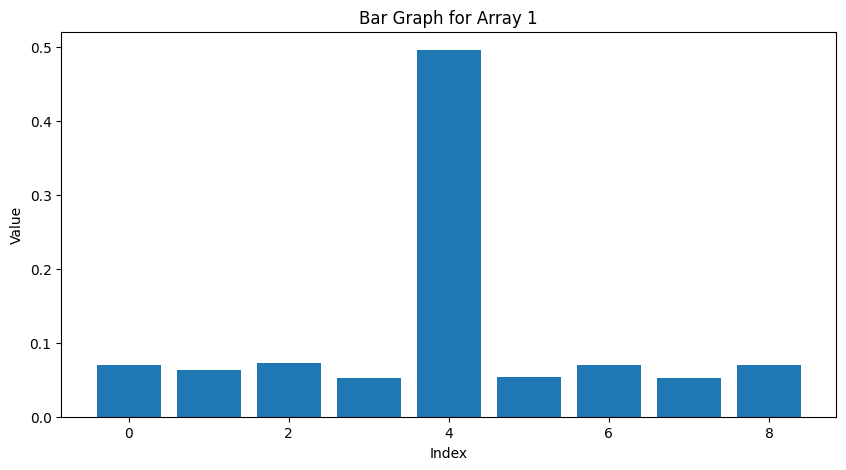

Search #2: [0.07451 0.07072 0.07414 0.05666 0.45615 0.05736 0.07609 0.0607  0.07367]


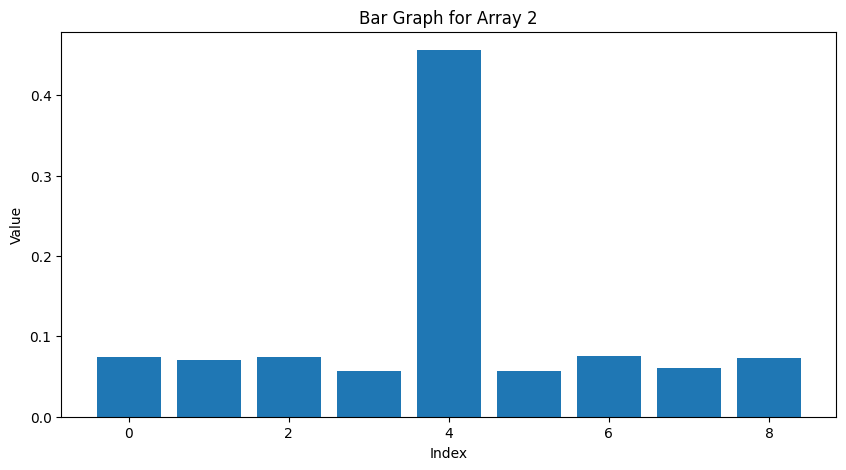

Search #3: [0.06748 0.06176 0.07252 0.06505 0.47144 0.06027 0.07188 0.06283 0.06677]


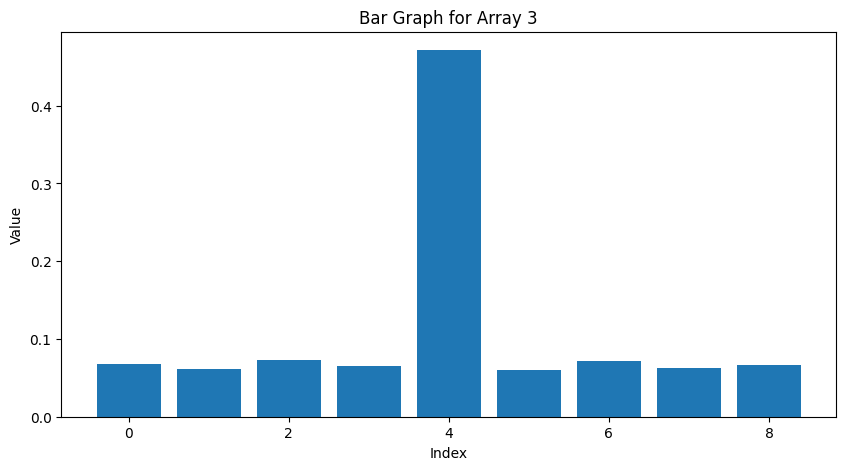

In [32]:
# %pip install matplotlib

from mcts_classic import MCTS
from tictactoe import TicTacToe
import matplotlib.pyplot as plt

for i in range(3):
    # Define game
    game = TicTacToe()
    state = game.get_initial_state()

    # Run MCTS
    mcts = MCTS(game, {'num_searches': 100000, 'C': 1.4})
    action_probs = mcts.search(state)
    print(f"Search #{i+1}: {action_probs}")
    array = action_probs
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(array)), array)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Bar Graph for Array {i+1}')
    plt.show()